# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [2]:
# Your code to explore the data
#df_flights[pd.isnull(df_flights["DepDel15"])]
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
#df_flights.DepDel15.notnull().sum()

{'whiskers': [<matplotlib.lines.Line2D at 0x1190b7fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x119108550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1190b7d30>],
 'medians': [<matplotlib.lines.Line2D at 0x119108a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x119108d30>],
 'means': []}

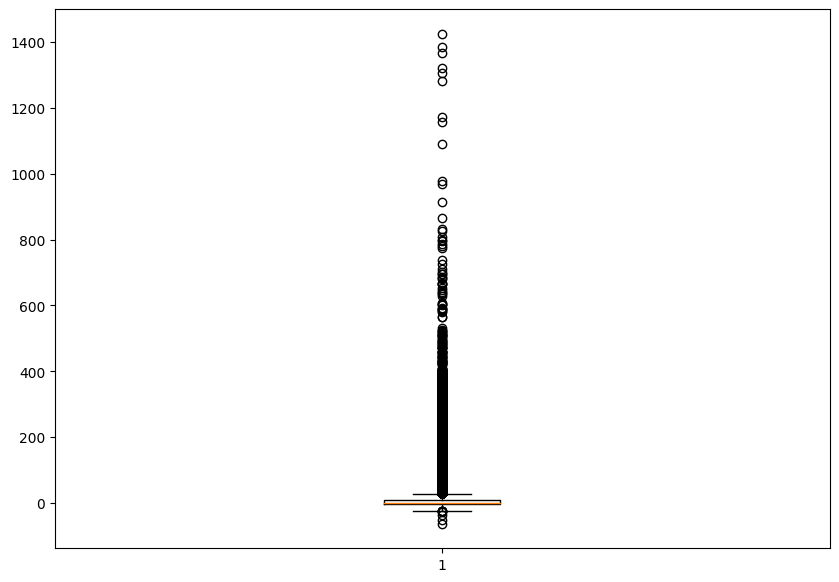

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_flights.DepDelay)

In [4]:
#1.
def remove_outliers(df):
    cols = ["DepDelay","ArrDelay"]
    q1 = df[cols].quantile(q=0.25) 
    q3 = df[cols].quantile(q=0.75)
    IQR = q3 - q1
    df = df[~((df[cols]<(q1-1.5*IQR)) | (df[cols]>(q3+1.5*IQR))).any(axis=1)]
    return df
clean_df =remove_outliers(df_flights)
df_flights.describe()


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


array([[<AxesSubplot: title={'center': 'DepDelay'}>,
        <AxesSubplot: title={'center': 'ArrDelay'}>]], dtype=object)

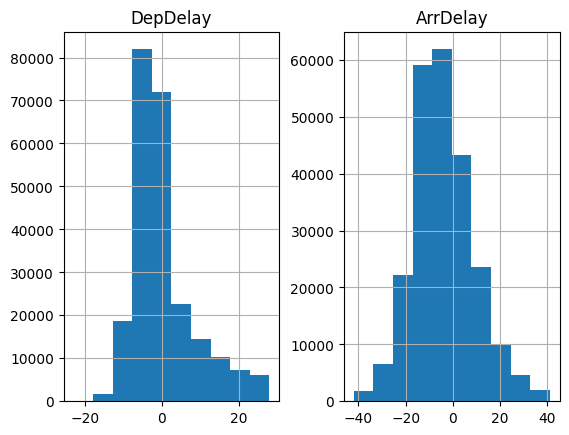

In [5]:
#2.
clean_df[["DepDelay","ArrDelay"]].hist()

Text(0.5, 0.98, 'Departure and Arrive Delay Distributions')

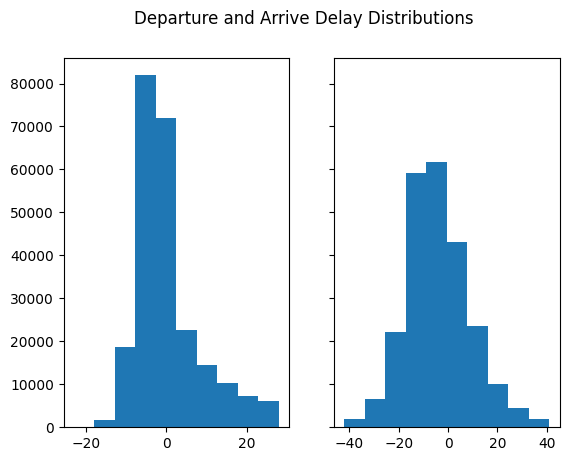

In [6]:
fig, ax = plt.subplots(1,2,sharey=True,edgecolor="black")
ax[0].hist(clean_df["DepDelay"])
ax[1].hist(clean_df["ArrDelay"])
fig.suptitle("Departure and Arrive Delay Distributions")

In [7]:
# What are the average time delays for departure and arrival?
depDel = clean_df["DepDelay"].mean()
arrDel = clean_df["ArrDelay"].mean()
print(f'Mean delay time for Departure is {round(depDel,2)} mins.\nMean delay time for Arrival is {round(arrDel,2)} mins.')

Mean delay time for Departure is 0.37 mins.
Mean delay time for Arrival is -4.03 mins.


<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='Carrier'>

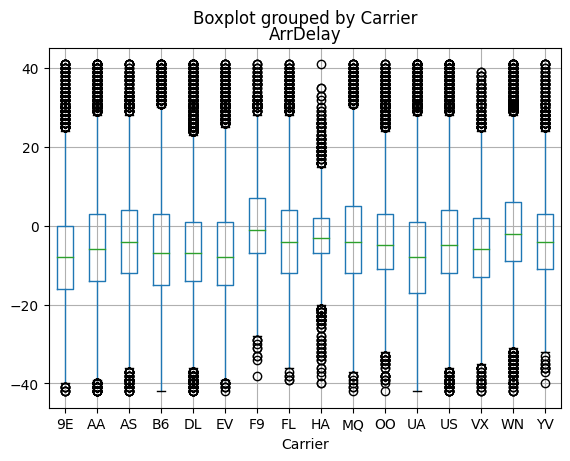

In [8]:
# Comparison of delays differ by carrier.
#grouped = clean_df.groupby("Carrier")
#grouped[["DepDelay","ArrDelay"]].agg(['count','sum','mean'])
#grouped["DepDelay"].hist()
clean_df.boxplot(by="Carrier",column=['ArrDelay'])

<AxesSubplot: title={'center': 'DepDelay'}, xlabel='Carrier'>

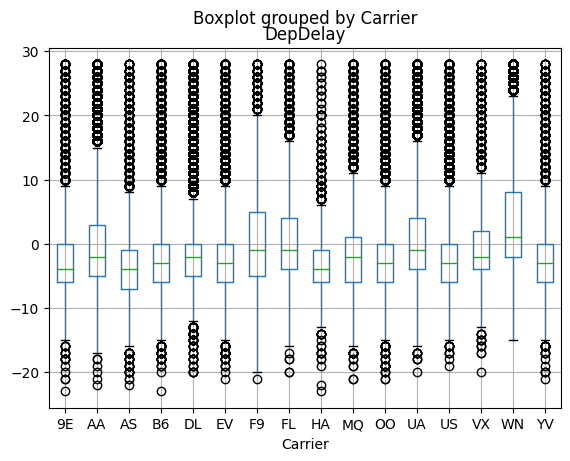

In [9]:
clean_df.boxplot(by="Carrier",column=['DepDelay'])

<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='DayOfWeek'>

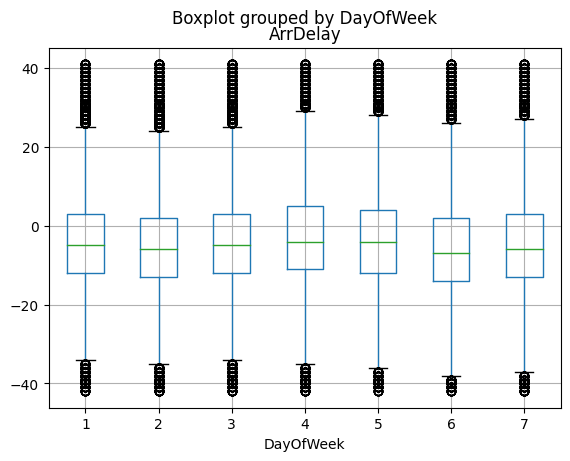

In [10]:
clean_df.boxplot(by="DayOfWeek",column="ArrDelay")

In [11]:
#fig = plt.figure(figsize=(10,4))
airports = clean_df["OriginAirportName"]
arrDelays = clean_df["ArrDelay"]

<AxesSubplot: xlabel='OriginAirportName'>

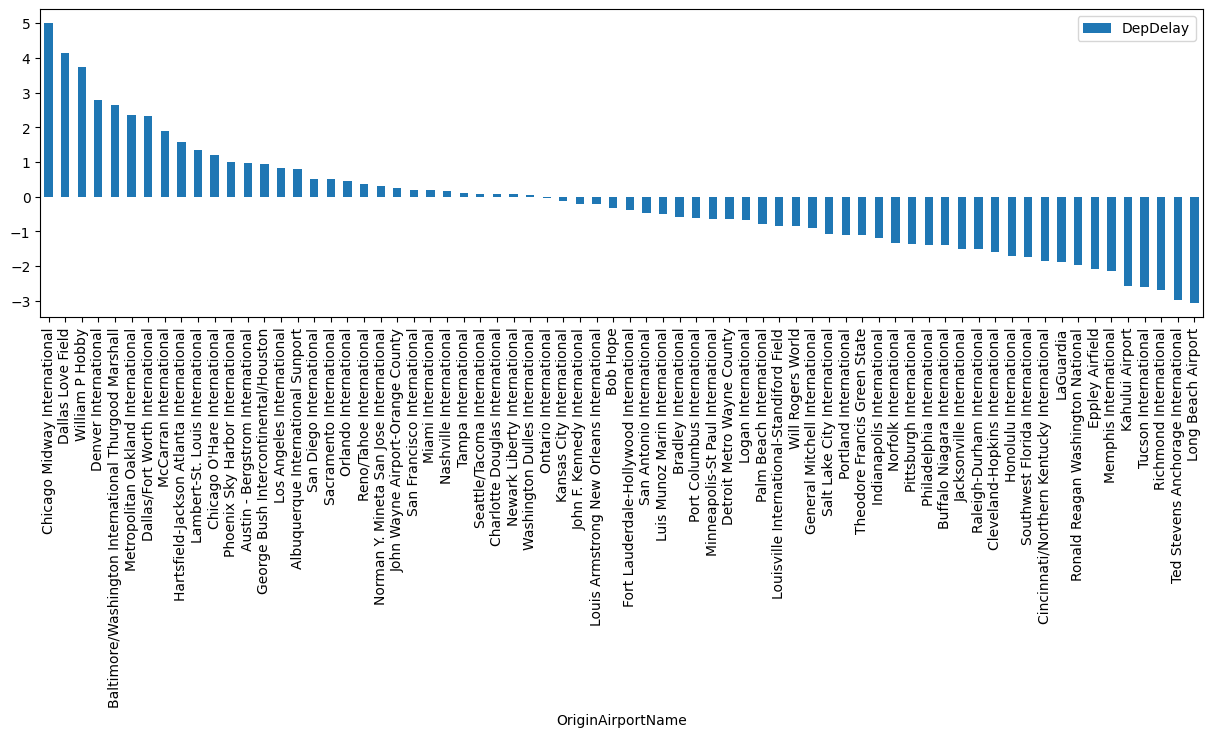

In [28]:
# which departure airport has the longest average delays

grouped_by_airport = clean_df.groupby(clean_df.OriginAirportName)
meanDel_by_airport = grouped_by_airport[["DepDelay"]].agg("mean").sort_values("DepDelay",ascending=False)
meanDel_by_airport.plot(kind="bar",figsize=(15,4))